In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df_bmi = df.drop('Outcome',axis=1)

In [6]:
df_bmi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
X=df_bmi.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [9]:
y = df_bmi['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [18]:
Y = pd.get_dummies(y).values

In [11]:
X = X.values

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 


In [20]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(7,),activation='tanh'))
model.add(Dense(300,activation='tanh'))
model.add(Dense(300,activation='tanh'))
model.add(Dense(248,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                80        
                                                                 
 dense_13 (Dense)            (None, 300)               3300      
                                                                 
 dense_14 (Dense)            (None, 300)               90300     
                                                                 
 dense_15 (Dense)            (None, 248)               74648     
                                                                 
Total params: 168328 (657.53 KB)
Trainable params: 168328 (657.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30



20/20 [==============================] - 1s 11ms/step - loss: 5.5457 - accuracy: 0.0081 - val_loss: 5.5596 - val_accuracy: 0.0000e+00
Epoch 2/30
20/20 [==============================] - 0s 4ms/step - loss: 5.1667 - accuracy: 0.0261 - val_loss: 5.6751 - val_accuracy: 0.0130
Epoch 3/30
20/20 [==============================] - 0s 4ms/step - loss: 5.0193 - accuracy: 0.0326 - val_loss: 5.8427 - val_accuracy: 0.0260
Epoch 4/30
20/20 [==============================] - 0s 4ms/step - loss: 4.9151 - accuracy: 0.0277 - val_loss: 5.9438 - val_accuracy: 0.0260
Epoch 5/30
20/20 [==============================] - 0s 4ms/step - loss: 4.8282 - accuracy: 0.0277 - val_loss: 6.0656 - val_accuracy: 0.0195
Epoch 6/30
20/20 [==============================] - 0s 3ms/step - loss: 4.7483 - accuracy: 0.0326 - val_loss: 6.1640 - val_accuracy: 0.0195
Epoch 7/30
20/20 [==============================] - 0s 3ms/step - loss: 4.7039 - accuracy: 0.0407 - val_loss: 6.2659 - val_accuracy: 0.0195
Epoch 8/30
20/20 [========

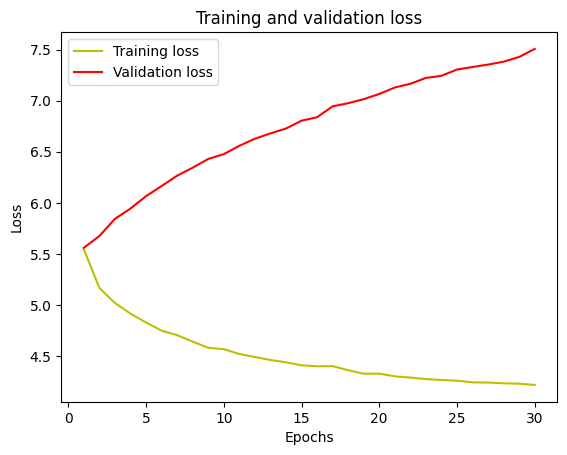

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

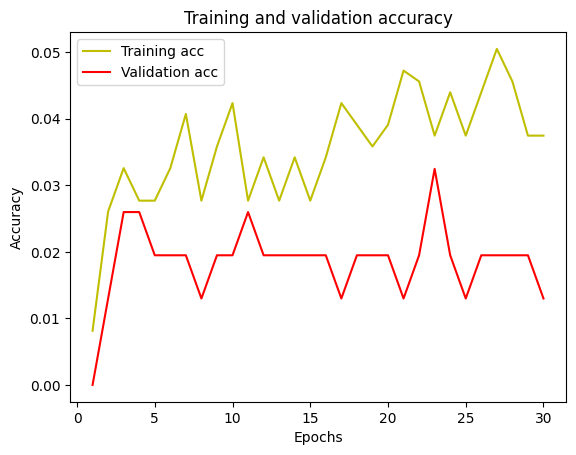

In [23]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.18      0.67      0.29         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         2
          44       0.00      0.00      0.00         2
          46       0.00    

C:\Users\yosim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yosim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yosim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie